In [1]:
import pandas as pd
import os
import seaborn as sns
import  matplotlib.pyplot as plt
from pathlib import Path

In [2]:
df = pd.read_csv("hf://datasets/dazzle-nu/CIS435-CreditCardFraudDetection/fraudTrain.csv")
df.head()

/Users/romacarapetean/Desktop/Projects/Credit_Card_Fraud_Detection/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Unnamed: 23,6006
0,0,1/1/19 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",3/9/88,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,NaN,NaN
1,1,1/1/19 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,6/21/78,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,NaN
2,2,1/1/19 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1/19/62,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,NaN,NaN
3,3,1/1/19 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1/12/67,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,NaN
4,4,1/1/19 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,3/28/86,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,NaN,NaN


In [3]:
print(df.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'Unnamed: 23', '6006'],
      dtype='object')


In [4]:
null_counts = df.isnull().sum()
print(null_counts)

Unnamed: 0                     0
trans_date_trans_time          0
cc_num                         0
merchant                       0
category                       0
amt                            0
first                          0
last                           0
gender                         0
street                         0
city                           0
state                          0
zip                            0
lat                            0
long                           0
city_pop                       0
job                            0
dob                            0
trans_num                      0
unix_time                      0
merch_lat                      0
merch_long                     0
is_fraud                       0
Unnamed: 23              1048575
6006                     1048575
dtype: int64


The dataset doesn't have any null values, however it has Personal Data columns like and unnamed columns:
'cc_num', 'trans_num', 'first', 'last', 'street', 'Unnamed: 0', '6006', 'Unnamed: 23' which are gonna be deleted in the preprocessing step

In [5]:
# Read the preprocessed DataFrame for further visualization
cleaned_path = Path('../data_cache/cleanedFraudDataset.csv')
preprocessed_df = pd.read_csv(cleaned_path)
preprocessed_df.head()

,is_fraud,merchant_encoding,age,user_merchant_distance_km,day_of_week,hour,month,is_weekend,is_night,category_encoded,...,zip_encoded,job_freq,city_freq,gender_encoded,amt_log,city_pop_log,amt_bin_encoded,city_pop_bin_encoded,amt_outlier,city_pop_outlier
0,0,514,31,78.6,6,0,1,1,1,0.014526,...,0.000000,0.002762,0.001579,0,1.786747,8.159375,0,0,0,0
1,0,241,41,30.2,6,0,1,1,1,0.013973,...,0.000000,0.003930,0.002779,0,4.684259,5.010635,2,0,0,0
2,0,390,57,108.2,6,0,1,1,1,0.002435,...,0.000000,0.000380,0.000380,1,5.398660,8.332068,2,0,1,0
3,0,360,52,95.7,6,0,1,1,1,0.004679,...,0.037975,0.001940,0.000377,1,3.828641,7.570443,1,0,0,0
4,0,297,33,77.6,6,0,1,1,1,0.003008,...,0.000000,0.001571,0.001571,1,3.760269,4.605170,1,0,0,0


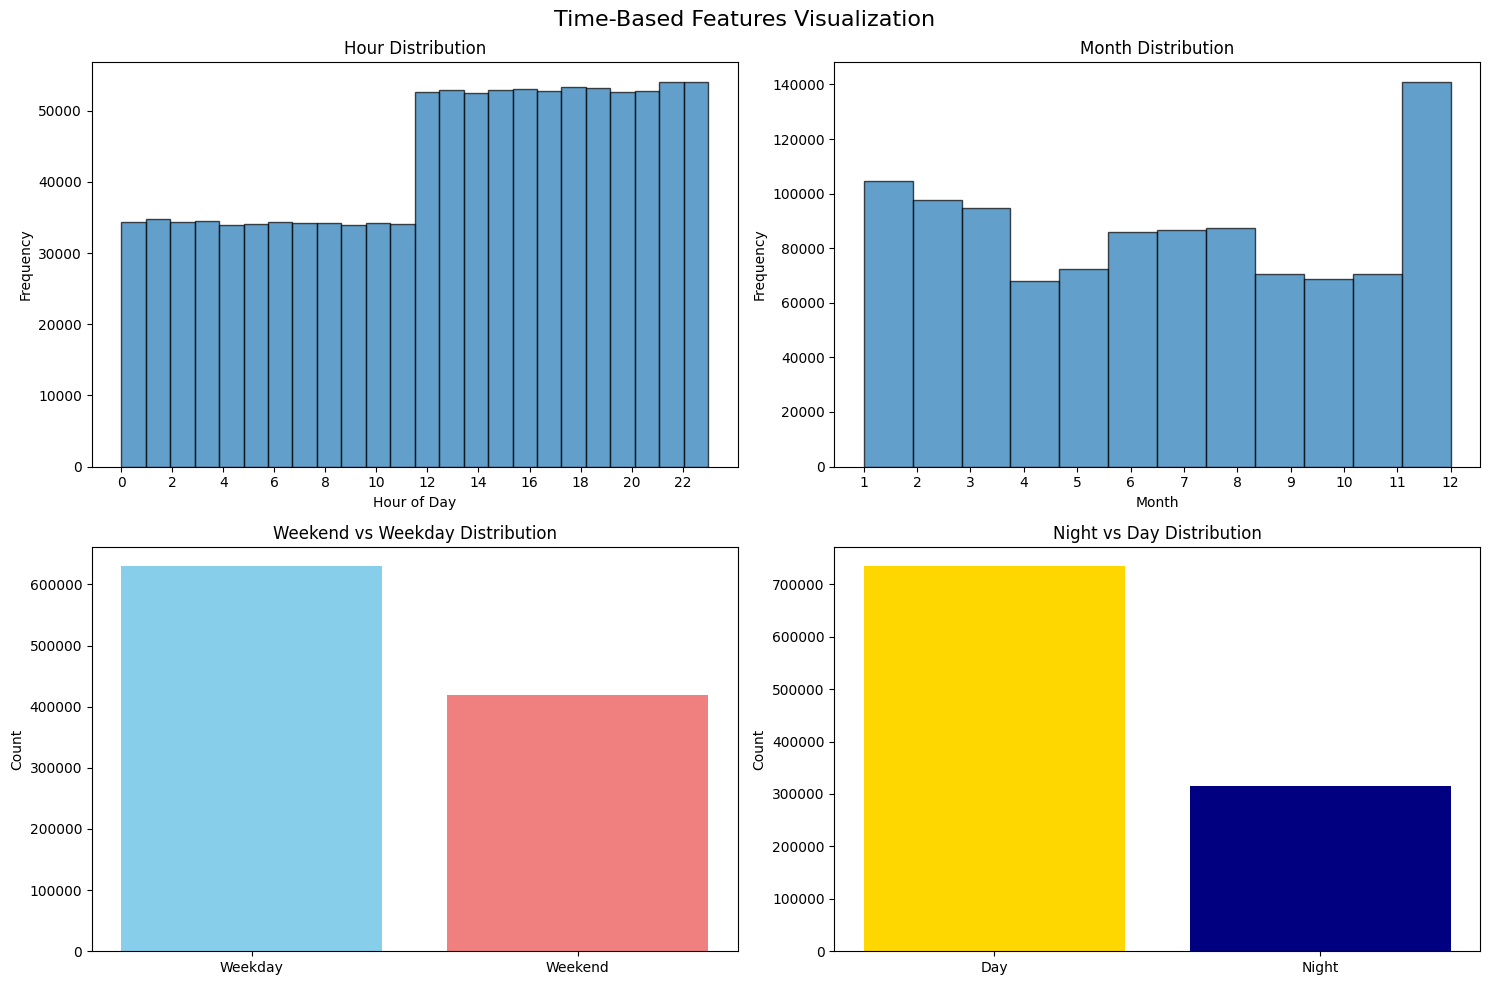


Time Features Summary:

HOUR:
  Data type: int64
  Unique values: 24
  Value counts:
hour
0     34412
1     34757
2     34407
3     34556
4     33943
5     34106
6     34316
7     34158
8     34256
9     34006
10    34236
11    34089
12    52703
13    52964
14    52542
15    52976
16    53114
17    52841
18    53392
19    53135
20    52628
21    52841
22    54103
23    54094
Name: count, dtype: int64

MONTH:
  Data type: int64
  Unique values: 12
  Value counts:
month
1     104727
2      97657
3      94671
4      68078
5      72532
6      86064
7      86596
8      87359
9      70652
10     68758
11     70421
12    141060
Name: count, dtype: int64

IS_WEEKEND:
  Data type: int64
  Unique values: 2
  Value counts:
is_weekend
0    629579
1    418996
Name: count, dtype: int64

IS_NIGHT:
  Data type: int64
  Unique values: 2
  Value counts:
is_night
0    734197
1    314378
Name: count, dtype: int64


In [6]:
# Visualize time-based features
time_features = ['hour', 'month', 'is_weekend', 'is_night']

# Create subplots for each feature
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Time-Based Features Visualization', fontsize=16)

# Hour distribution
if 'hour' in preprocessed_df.columns:
    axes[0, 0].hist(preprocessed_df['hour'], bins=24, edgecolor='black', alpha=0.7)
    axes[0, 0].set_title('Hour Distribution')
    axes[0, 0].set_xlabel('Hour of Day')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_xticks(range(0, 24, 2))

# Month distribution
if 'month' in preprocessed_df.columns:
    axes[0, 1].hist(preprocessed_df['month'], bins=12, edgecolor='black', alpha=0.7)
    axes[0, 1].set_title('Month Distribution')
    axes[0, 1].set_xlabel('Month')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_xticks(range(1, 13))

# Weekend vs Weekday
if 'is_weekend' in preprocessed_df.columns:
    weekend_counts = preprocessed_df['is_weekend'].value_counts()
    axes[1, 0].bar(['Weekday', 'Weekend'], weekend_counts.values, color=['skyblue', 'lightcoral'])
    axes[1, 0].set_title('Weekend vs Weekday Distribution')
    axes[1, 0].set_ylabel('Count')

# Night vs Day
if 'is_night' in preprocessed_df.columns:
    night_counts = preprocessed_df['is_night'].value_counts()
    axes[1, 1].bar(['Day', 'Night'], night_counts.values, color=['gold', 'navy'])
    axes[1, 1].set_title('Night vs Day Distribution')
    axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nTime Features Summary:")
for feature in time_features:
    if feature in preprocessed_df.columns:
        print(f"\n{feature.upper()}:")
        print(f"  Data type: {preprocessed_df[feature].dtype}")
        print(f"  Unique values: {preprocessed_df[feature].nunique()}")
        print(f"  Value counts:")
        print(preprocessed_df[feature].value_counts().sort_index())
        